In [1]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
from mlxtend.preprocessing import TransactionEncoder

In [3]:
import pandas as pd
min

<function min>

In [4]:
dataset = pd.read_csv('/content/my_movies.csv')

In [5]:
dataset.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [8]:
X = dataset.iloc[:, 5:14]

In [10]:
X

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart
0,1,0,1,1,0,1,0,0,0
1,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,0,0
5,1,1,0,0,1,0,0,0,0
6,0,0,0,1,0,0,1,0,0
7,0,1,0,0,1,0,0,0,0
8,1,1,0,0,1,0,0,0,0
9,1,1,0,0,0,0,0,1,0


In [9]:
frequent_itemsets = apriori(X, min_support=0.1, use_colnames= True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.5,"(Sixth Sense, Gladiator)"


In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
79,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
80,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
81,(Sixth Sense),"(LOTR1, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
82,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [13]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
74,"(Sixth Sense, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
79,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
77,"(Sixth Sense, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
76,"(Harry Potter1, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
40,"(Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
...,...,...,...,...,...,...,...,...,...
5,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96


In [12]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
74,"(Sixth Sense, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
79,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
77,"(Sixth Sense, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
76,"(Harry Potter1, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40,"(Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
25,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8
66,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
65,"(Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
57,(LOTR2),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
56,(Harry Potter1),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [14]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
79,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
80,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
81,(Sixth Sense),"(LOTR1, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
82,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

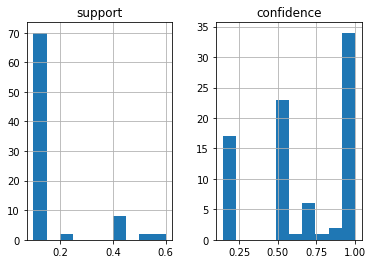

In [15]:
rules[['support','confidence']].hist()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

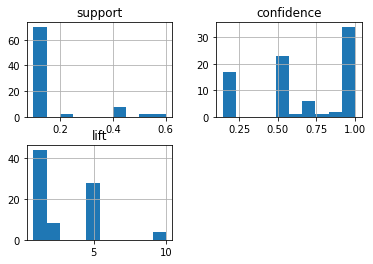

In [16]:
rules[['support','confidence','lift']].hist()

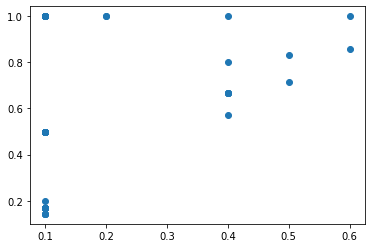

In [18]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'])
plt.show()

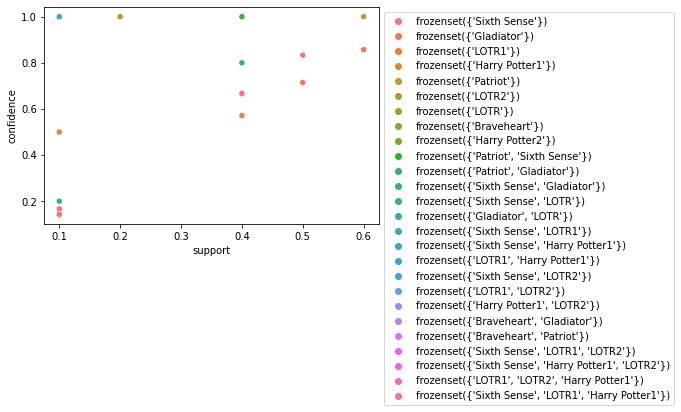

In [19]:
import seaborn as sns
sns.scatterplot(data = rules, x = 'support', y = 'confidence', hue='antecedents')
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))
plt.show()

In [21]:
# WITH DIFFERENT SUPPORT VALUE
frequent_itemsets = apriori(X, min_support=0.2, use_colnames=True) 
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.5,"(Sixth Sense, Gladiator)"
7,0.4,"(Patriot, Sixth Sense)"
8,0.6,"(Patriot, Gladiator)"
9,0.2,"(LOTR1, LOTR2)"


In [22]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

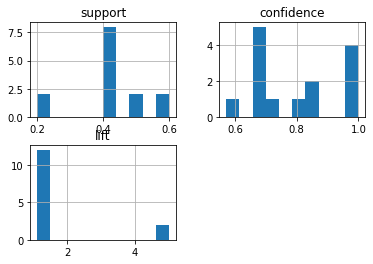

In [23]:
rules[['support','confidence','lift']].hist()

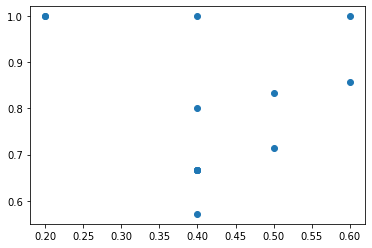

In [24]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

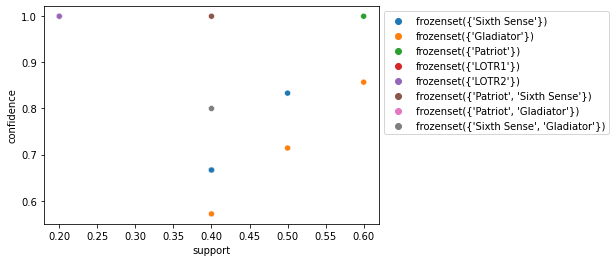

In [25]:
sns.scatterplot(data = rules, x = 'support', y = 'confidence', hue='antecedents')
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))
plt.show()

In [27]:
# APRIORI FOR FREQUENBT ITEMS WITH ATLEAST 2 ITEMS
frequent_itemsets = apriori(X, min_support=0.1, use_colnames=True,max_len=2) 
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.5,"(Sixth Sense, Gladiator)"


In [34]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
5,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
8,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
9,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


In [35]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
24,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
21,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
20,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
23,(LOTR2),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
22,(Harry Potter1),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
19,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
18,(LOTR1),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
27,(Patriot),(Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
26,(Braveheart),(Patriot),0.1,0.6,0.1,1.000000,1.666667,0.04,inf


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

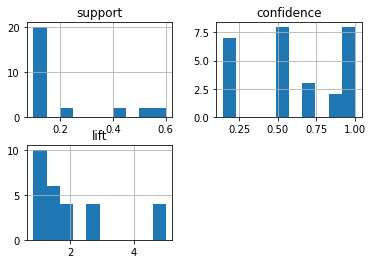

In [36]:
rules[['support','confidence','lift']].hist()

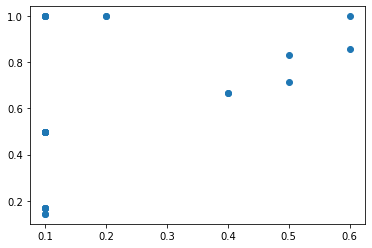

In [37]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

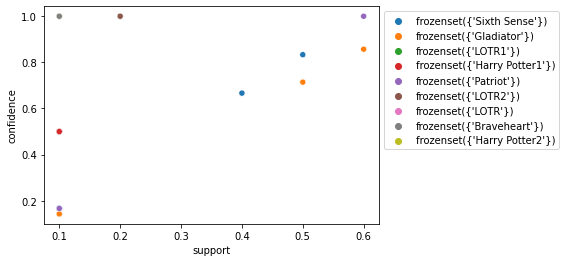

In [38]:
sns.scatterplot(data = rules, x = 'support', y = 'confidence', hue='antecedents')
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))
plt.show()